In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()
sns.set(style="darkgrid")

In [30]:
Anz =  pd.read_excel("ANZ synthesised transaction dataset.xlsx")
Anz.head(1)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit


In [31]:
Anz.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [12]:
#count Number of unique accounts
Anz["account"].nunique()

100

In [32]:
#Drop irrelevent Columns

Anz =Anz[["status","card_present_flag","balance","date",
                   "gender","age", 'txn_description',"merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
Anz.head(2)

,status,card_present_flag,balance,date,gender,age,txn_description,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,POS,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,SALES-POS,Sydney,NSW,14.19,CUS-2487424745,debit


In [53]:
Anz.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


In [54]:
Anz.describe(include='object')

,status,gender,txn_description,merchant_suburb,merchant_state,customer_id,movement,Months
count,12043,12043,12043,7717,7717,12043,12043,12043
unique,2,2,6,1609,8,100,2,3
top,authorized,M,SALES-POS,Melbourne,NSW,CUS-2487424745,debit,October
freq,7717,6285,3934,255,2169,578,11160,4087


In [55]:
Anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 13 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
txn_description      12043 non-null object
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
amount               12043 non-null float64
customer_id          12043 non-null object
movement             12043 non-null object
Months               12043 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.2+ MB


In [33]:
Anz.isnull().sum()

status                  0
card_present_flag    4326
balance                 0
date                    0
gender                  0
age                     0
txn_description         0
merchant_suburb      4326
merchant_state       4326
amount                  0
customer_id             0
movement                0
dtype: int64

In [40]:
salary_trans = Anz[Anz['txn_description']=='PAY/SALARY']

male_salary=salary_trans[salary_trans['gender']=='M']

female_salary=salary_trans[salary_trans['gender']=='F']


In [41]:
avg_male_salary=male_salary['amount'].values.mean()
avg_male_salary


2096.811681034483

In [42]:
avg_female_salary=female_salary['amount'].values.mean()
avg_female_salary

1679.370477326969

### Transaction Volume each day

In [66]:
Anz_date_count = Anz.groupby("date").count()


In [68]:
trans_vol = Anz_date_count["customer_id"].mean()
n_points = len(Anz_date_count.index)

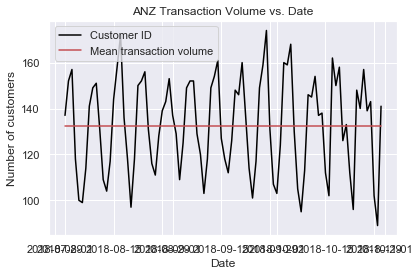

In [74]:
plt.figure(figsize=(10,5))
plt.plot(Anz_date_count.index, Anz_date_count["customer_id"], c="black", label = "Customer ID")
plt.plot(Anz_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="r", label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()

### Mean Transaction amount each day

In [76]:
Anz_date_mean = Anz.groupby("date").mean()

In [77]:
trans_amt = Anz_date_mean["amount"].mean()
n_points = len(Anz_date_count.index)

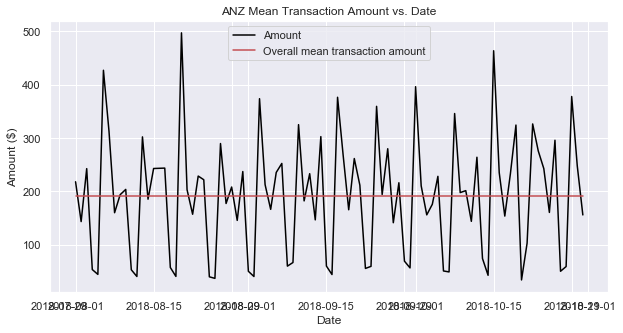

In [79]:
plt.figure(figsize=(10,5))
plt.plot(Anz_date_count.index, Anz_date_mean["amount"], c="black", label = "Amount")
plt.plot(Anz_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="r", label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()

In [80]:
months = []
for date in Anz["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

Anz["Months"] = months
Anz["Months"].head()

0    August
1    August
2    August
3    August
4    August
Name: Months, dtype: object

In [81]:
Anz_cus_aug = Anz[Anz["Months"] == "August"].groupby("customer_id").mean()
Anz_gen_aug = Anz[Anz["Months"] == "August"].groupby("gender").mean()

In [82]:
mean_f_bal_aug = Anz_gen_aug["balance"].iloc[0]
mean_m_bal_aug = Anz_gen_aug["balance"].iloc[1]
n_points = len(Anz_cus_aug["age"])

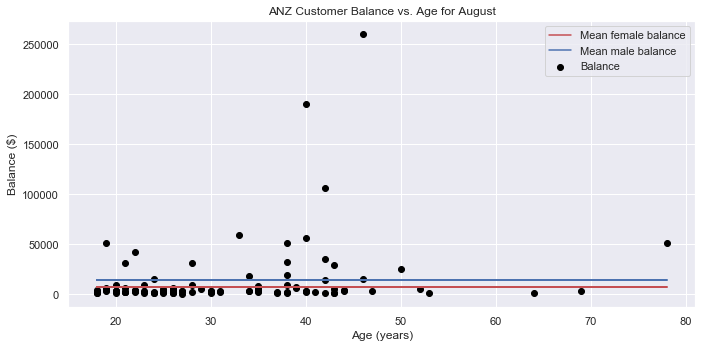

In [86]:
plt.figure(figsize=(10,5))
plt.scatter(Anz_cus_aug["age"], Anz_cus_aug["balance"], c="black", label="Balance")
plt.plot(Anz_cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(Anz_cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [87]:
mean_f_amt_aug = Anz_gen_aug["amount"].iloc[0]
mean_m_amt_aug = Anz_gen_aug["amount"].iloc[1]

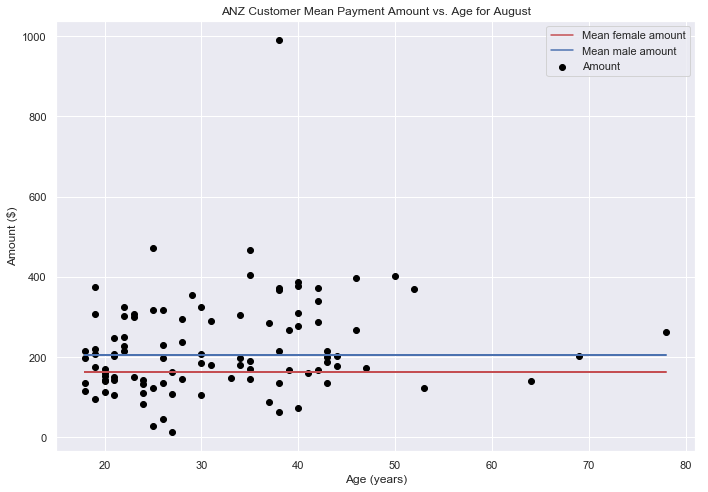

In [89]:
plt.figure(figsize=(10,7))
plt.scatter(Anz_cus_aug["age"], Anz_cus_aug["amount"], c="black", label="Amount")
plt.plot(Anz_cus_aug["age"], np.linspace(mean_f_amt_aug,mean_f_amt_aug,n_points), c="r", label = "Mean female amount")
plt.plot(Anz_cus_aug["age"], np.linspace(mean_m_amt_aug,mean_m_amt_aug,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [91]:
Anz_cus_sep = Anz[Anz["Months"] == "September"].groupby("customer_id").mean()
Anz_gen_sep = Anz[Anz["Months"] == "September"].groupby("gender").mean()

In [92]:
mean_f_bal_sep = Anz_gen_sep["balance"].iloc[0]
mean_m_bal_sep = Anz_gen_sep["balance"].iloc[1]
n_points = len(Anz_cus_sep["age"])

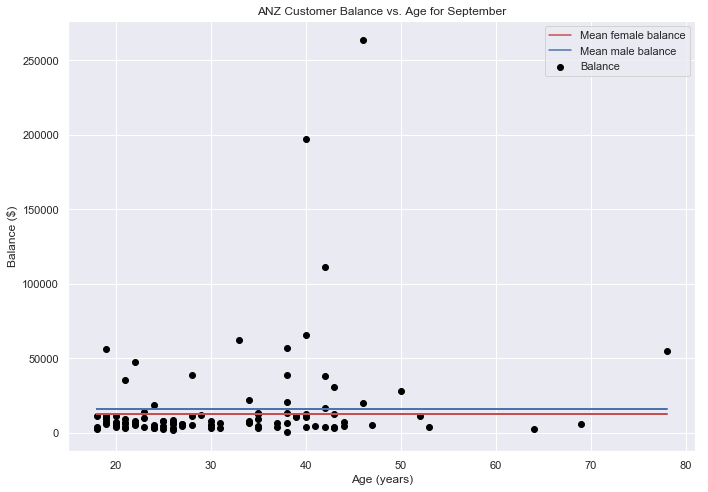

In [93]:
plt.figure(figsize=(10,7))
plt.scatter(Anz_cus_sep["age"], Anz_cus_sep["balance"], c="black", label="Balance")
plt.plot(Anz_cus_sep["age"], np.linspace(mean_f_bal_sep,mean_f_bal_sep,n_points), c="r", label = "Mean female balance")
plt.plot(Anz_cus_sep["age"], np.linspace(mean_m_bal_sep,mean_m_bal_sep,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [94]:
mean_f_amt_sep = Anz_gen_sep["amount"].iloc[0]
mean_m_amt_sep = Anz_gen_sep["amount"].iloc[1]

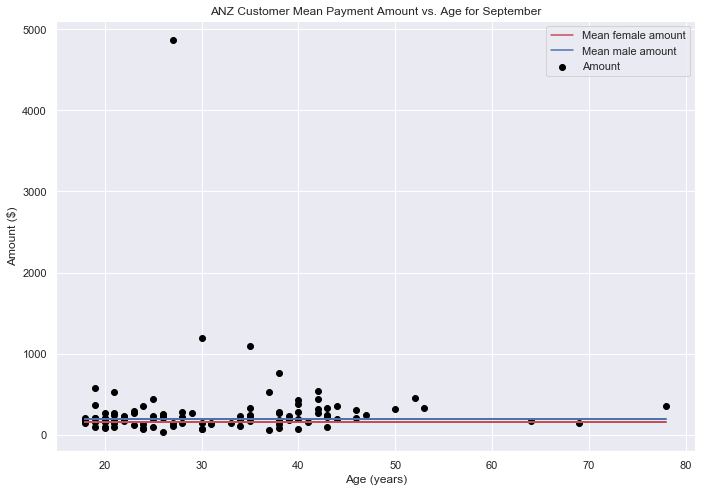

In [95]:
plt.figure(figsize=(10,7))
plt.scatter(Anz_cus_sep["age"], Anz_cus_sep["amount"], c="black", label="Amount")
plt.plot(Anz_cus_sep["age"], np.linspace(mean_f_amt_sep,mean_f_amt_sep,n_points), c="r", label = "Mean female amount")
plt.plot(Anz_cus_sep["age"], np.linspace(mean_m_amt_sep,mean_m_amt_sep,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [96]:
Anz_cus_oct = Anz[Anz["Months"] == "October"].groupby("customer_id").mean()
Anz_gen_oct = Anz[Anz["Months"] == "October"].groupby("gender").mean()

In [97]:
mean_f_bal_oct = Anz_gen_oct["balance"].iloc[0]
mean_m_bal_oct = Anz_gen_oct["balance"].iloc[1]
n_points = len(Anz_cus_oct["age"])

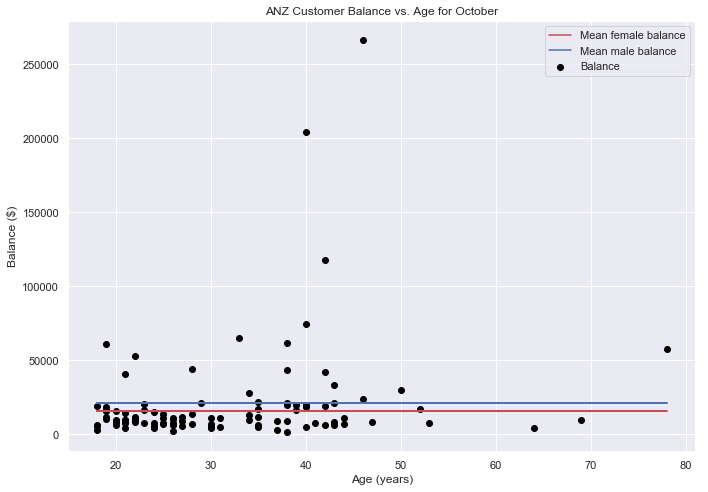

In [99]:
plt.figure(figsize=(10,7))
plt.scatter(Anz_cus_oct["age"], Anz_cus_oct["balance"], c="black", label="Balance")
plt.plot(Anz_cus_oct["age"], np.linspace(mean_f_bal_oct,mean_f_bal_oct,n_points), c="r", label = "Mean female balance")
plt.plot(Anz_cus_oct["age"], np.linspace(mean_m_bal_oct,mean_m_bal_oct,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [100]:
mean_f_amt_oct = Anz_gen_oct["amount"].iloc[0]
mean_m_amt_oct = Anz_gen_oct["amount"].iloc[1]

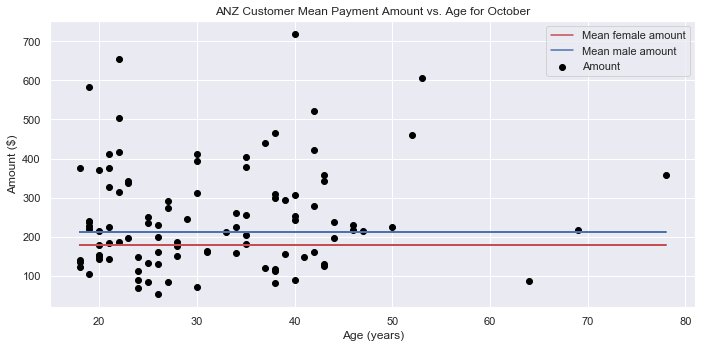

In [102]:
plt.figure(figsize=(10,5))
plt.scatter(Anz_cus_oct["age"], Anz_cus_oct["amount"], c="black", label="Amount")
plt.plot(Anz_cus_oct["age"], np.linspace(mean_f_amt_oct,mean_f_amt_oct,n_points), c="r", label = "Mean female amount")
plt.plot(Anz_cus_oct["age"], np.linspace(mean_m_amt_oct,mean_m_amt_oct,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()